The `FrozenLake-v1` environment is a classic reinforcement learning environment from Gymnasium (formerly OpenAI Gym). It's a simple grid-world problem designed to teach agents to navigate from a starting point ('S') to a goal ('G') while avoiding holes ('H') on a frozen lake.

Here's a breakdown:

*   **Grid Structure**: It's typically a 4x4 grid (though other sizes exist). Each cell in the grid represents a 'state'.
*   **States**: In a 4x4 grid, there are 16 possible states, numbered 0 to 15. These numbers correspond to the cells in the grid, usually row by row (0, 1, 2, 3 in the first row, 4, 5, 6, 7 in the second, and so on).
    *   **S (Start)**: The initial state where the agent begins.
    *   **F (Frozen)**: Safe frozen surfaces where the agent can move.
    *   **H (Hole)**: If the agent steps into a hole, the episode terminates, and it receives zero reward.
    *   **G (Goal)**: If the agent reaches the goal, the episode terminates, and it receives a positive reward (typically 1).
*   **Actions**: The agent can take 4 discrete actions:
    *   `0`: LEFT
    *   `1`: DOWN
    *   `2`: RIGHT
    *   `3`: UP
*   **Reward**: The agent receives a reward of 1 for reaching the goal and 0 for all other steps (including falling into a hole or taking a step that doesn't terminate the episode).
*   **Deterministic vs. Slippery**: The environment can be created as either deterministic (`is_slippery=False`) or stochastic (`is_slippery=True`).
    *   In a **deterministic** environment, taking an action always moves the agent in the intended direction.
    *   In a **slippery** environment, there's a probability (e.g., 1/3) that the agent will move in the intended direction, and a probability that it will slip to an adjacent cell (left or right of the intended direction). This makes the problem much harder, as actions don't always yield predictable outcomes.

The goal is for the agent to learn a policy (a strategy) that maximizes its cumulative reward over time, essentially finding the safest and shortest path to the goal.

#IMPORTING THE LIBRARIES

In [ ]:
import gymnasium as gym
import random
import numpy as np

#SETTING THE ENVIONMENT

In [ ]:
# Create the FrozenLake-v1 environment
# is_slippery=False makes the environment deterministic, easier for initial learning
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

#Resetting the Environment

In [ ]:
# Reset the environment to get the initial observation and info
observation, info = env.reset()
print(f"Initial Observation: {observation}")
print(f"Initial Info: {info}")

# You can explore the action and observation space
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Initial Observation: 0
Initial Info: {'prob': 1}
Action Space: Discrete(4)
Observation Space: Discrete(16)


In [ ]:
env.spec.max_episode_steps

100

In [ ]:
#specification
env.spec

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4', 'is_slippery': False, 'render_mode': 'rgb_array'}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)

In [ ]:
env.observation_space

Discrete(16)

In [ ]:
#how much they can reach(reward threshold)
env.spec.reward_threshold

0.7

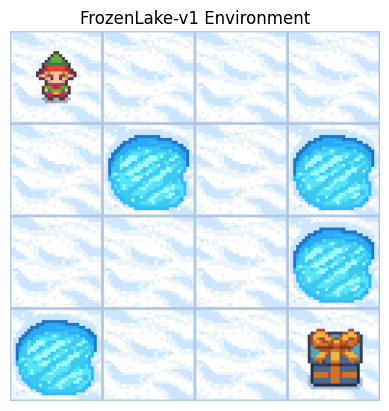

In [ ]:
import matplotlib.pyplot as plt

# Render the environment to get the image data
rendered_image = env.render()

# Display the image using matplotlib
plt.imshow(rendered_image)
plt.axis('off') # Turn off axis labels
plt.title('FrozenLake-v1 Environment')
plt.show()

0


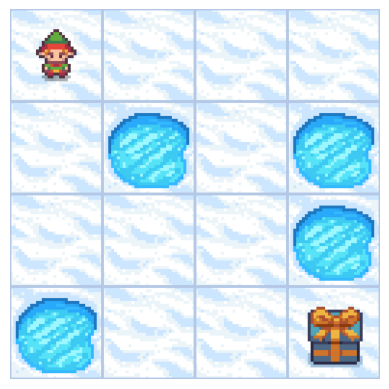

In [ ]:
import matplotlib.pyplot as plt
state=env.unwrapped.s#to bring initial state
print(state)
frame=env.render()#render() for visualizing
plt.imshow(frame)#imshow()- image showing
plt.axis('off') #to turn of the axis
plt.show()

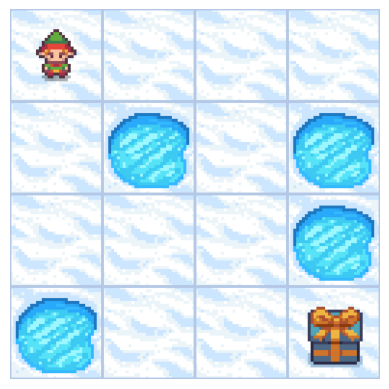

In [ ]:
env.unwrapped.s = 0
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

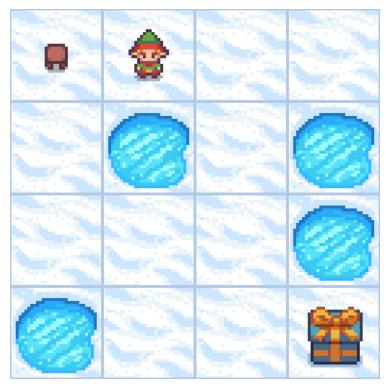

In [ ]:
env.unwrapped.s = 1
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

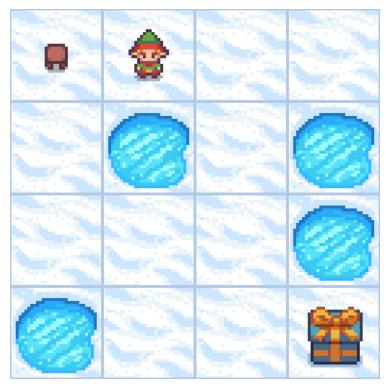

In [ ]:
env.unwrapped.s = 1
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

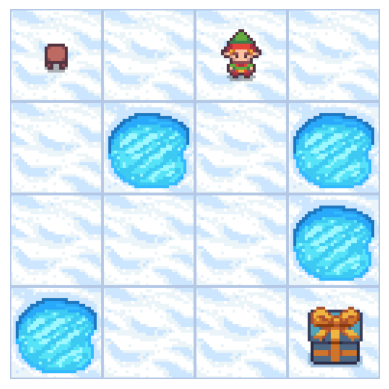

In [ ]:
env.unwrapped.s = 2
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

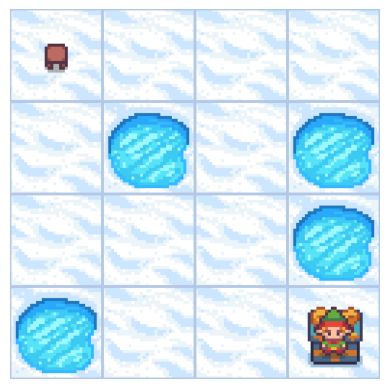

In [ ]:
env.unwrapped.s = 15
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

The action space is `Discrete(4)`, meaning there are 4 possible actions:
0: LEFT
1: DOWN
2: RIGHT
3: UP

The observation space is `Discrete(16)`, representing the 16 possible states (4x4 grid cells).

In [ ]:
import random

# Let's take a random action and see the result
action = env.action_space.sample() # Take a random action
print(f"Taking action: {action}")

observation, reward, terminated, truncated, info = env.step(action)

print(f"New Observation: {observation}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}") # True if the episode ended (goal reached or fell in hole)
print(f"Truncated: {truncated}")   # True if the episode ended due to time limit or other truncation condition
print(f"Info: {info}")

# Close the environment when done
env.close()

Taking action: 1
New Observation: 4
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


In [ ]:
import gymnasium as gym
import random

# Create the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

# Reset the environment to get the initial observation and info before taking a step
observation, info = env.reset()
print(f"Initial Observation (after reset): {observation}")

# Let's take a random action and see the result
action = env.action_space.sample() # Take a random action
print(f"Taking action: {action}")

observation, reward, terminated, truncated, info = env.step(action)

print(f"New Observation: {observation}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}") # True if the episode ended (goal reached or fell in hole)
print(f"Truncated: {truncated}")   # True if the episode ended due to time limit or other truncation condition
print(f"Info: {info}")

# Close the environment when done
env.close()

Initial Observation (after reset): 0
Taking action: 2
New Observation: 1
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


In [ ]:
import gymnasium as gym

# Create the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

# Reset the environment to get the initial observation
observation, info = env.reset()
print(f"Initial Observation: {observation}\n")

# Define the action mapping
action_map = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}

# Define the path as a sequence of actions:
# Suggested path: Down, Down, Right, Down, Right, Right, Down
action_sequence = [1, 1, 2, 1, 2, 2, 1]

# Execute the sequence of actions
for i, action in enumerate(action_sequence):
    print(f"--- Step {i+1} ---")
    print(f"Taking action: {action} ({action_map[action]}) ")
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"New Observation: {observation}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")
    print(f"Info: {info}")

    if terminated:
        if reward == 1.0:
            print("Goal reached!")
        else:
            print("Fell into a hole!")
        break # End episode if terminated
    print("\n")

# Close the environment when done
env.close()


Initial Observation: 0

--- Step 1 ---
Taking action: 1 (DOWN) 
New Observation: 4
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 2 ---
Taking action: 1 (DOWN) 
New Observation: 8
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 3 ---
Taking action: 2 (RIGHT) 
New Observation: 9
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 4 ---
Taking action: 1 (DOWN) 
New Observation: 13
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 5 ---
Taking action: 2 (RIGHT) 
New Observation: 14
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 6 ---
Taking action: 2 (RIGHT) 
New Observation: 15
Reward: 1
Terminated: True
Truncated: False
Info: {'prob': 1.0}
Goal reached!


Initial Observation: 0

--- Step 1 ---
Taking action: 1 (DOWN) 
New Observation: 4
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 2 ---
Taking action: 1 (DOWN) 
New Observation: 8
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 3 ---
Taking action: 2 (RIGHT) 
New Observation: 9
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 4 ---
Taking action: 1 (DOWN) 
New Observation: 13
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 5 ---
Taking action: 2 (RIGHT) 
New Observation: 14
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 6 ---
Taking action: 2 (RIGHT) 
New Observation: 15
Reward: 1
Terminated: True
Truncated: False
Info: {'prob': 1.0}
Goal reached!


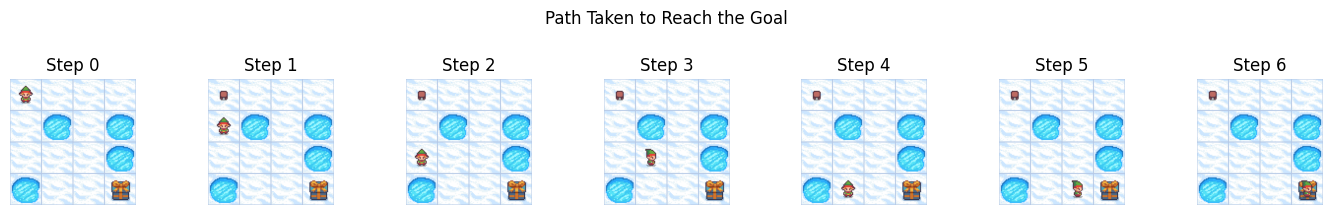

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt

# Create the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

# Reset the environment to get the initial observation
observation, info = env.reset()

# Define the action mapping (from previous successful run)
action_map = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}

# Define the path as a sequence of actions (from previous successful run):
action_sequence = [1, 1, 2, 1, 2, 2, 1]

# Store images for visualization
frames = []

# Initial frame
frames.append(env.render())

print(f"Initial Observation: {observation}\n")

# Execute the sequence of actions and capture frames
for i, action in enumerate(action_sequence):
    print(f"--- Step {i+1} ---")
    print(f"Taking action: {action} ({action_map[action]}) ")
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())

    print(f"New Observation: {observation}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")
    print(f"Info: {info}")

    if terminated:
        if reward == 1.0:
            print("Goal reached!")
        else:
            print("Fell into a hole!")
        break # End episode if terminated
    print("\n")

# Close the environment
env.close()

# Display the sequence of frames
fig, axes = plt.subplots(1, len(frames), figsize=(2 * len(frames), 2))
for i, frame in enumerate(frames):
    axes[i].imshow(frame)
    axes[i].axis('off')
    axes[i].set_title(f'Step {i}')

plt.suptitle('Path Taken to Reach the Goal', y=1.05)
plt.tight_layout()
plt.show()

Enumerate Method

It gives you:

index (starting from 0)

value (the item from the list)

### 1. Setup: Import Libraries and Initialize Deterministic FrozenLake Environment

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import random

# Create the FrozenLake-v1 environment (deterministic)
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

# Reset the environment to get the initial observation and info
observation, info = env.reset()
print(f"Initial Observation: {observation}")
print(f"Initial Info: {info}")

# Explore the action and observation space
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Initial Observation: 0
Initial Info: {'prob': 1}
Action Space: Discrete(4)
Observation Space: Discrete(16)


### 2. Visualize the Initial FrozenLake Grid

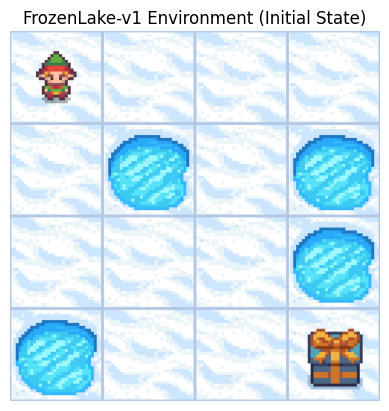

In [ ]:
# Render the environment to get the image data
rendered_image = env.render()

# Display the image using matplotlib
plt.imshow(rendered_image)
plt.axis('off') # Turn off axis labels
plt.title('FrozenLake-v1 Environment (Initial State)')
plt.show()

### 3. Implement and Execute a Path to the Goal (Deterministic)

In [ ]:
# Reset the environment for the pathfinding attempt
observation, info = env.reset()
print(f"Initial Observation for Pathfinding: {observation}\n")

# Define the action mapping
action_map = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}

# Define the path as a sequence of actions:
action_sequence = [1, 1, 2, 1, 2, 2, 1]

# Execute the sequence of actions
for i, action in enumerate(action_sequence):   #When you loop over an enumerate object, it yields pairs of (index, value) for each item in the sequence it was created from.
    print(f"--- Step {i+1} ---")
    print(f"Taking action: {action} ({action_map[action]}) ")
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"New Observation: {observation}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")
    print(f"Info: {info}")

    if terminated:
        if reward == 1.0:
            print("Goal reached!")
        else:
            print("Fell into a hole!")
        break # End episode if terminated
    print("\n")

Initial Observation for Pathfinding: 0

--- Step 1 ---
Taking action: 1 (DOWN) 
New Observation: 4
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 2 ---
Taking action: 1 (DOWN) 
New Observation: 8
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 3 ---
Taking action: 2 (RIGHT) 
New Observation: 9
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 4 ---
Taking action: 1 (DOWN) 
New Observation: 13
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 5 ---
Taking action: 2 (RIGHT) 
New Observation: 14
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 6 ---
Taking action: 2 (RIGHT) 
New Observation: 15
Reward: 1
Terminated: True
Truncated: False
Info: {'prob': 1.0}
Goal reached!


### 4. Visualize the Path Taken to Reach the Goal

Initial Observation for Visualization: 0

--- Step 1 ---
Taking action: 1 (DOWN) 
New Observation: 4
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 2 ---
Taking action: 1 (DOWN) 
New Observation: 8
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 3 ---
Taking action: 2 (RIGHT) 
New Observation: 9
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 4 ---
Taking action: 1 (DOWN) 
New Observation: 13
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 5 ---
Taking action: 2 (RIGHT) 
New Observation: 14
Reward: 0
Terminated: False
Truncated: False
Info: {'prob': 1.0}


--- Step 6 ---
Taking action: 2 (RIGHT) 
New Observation: 15
Reward: 1
Terminated: True
Truncated: False
Info: {'prob': 1.0}
Goal reached!


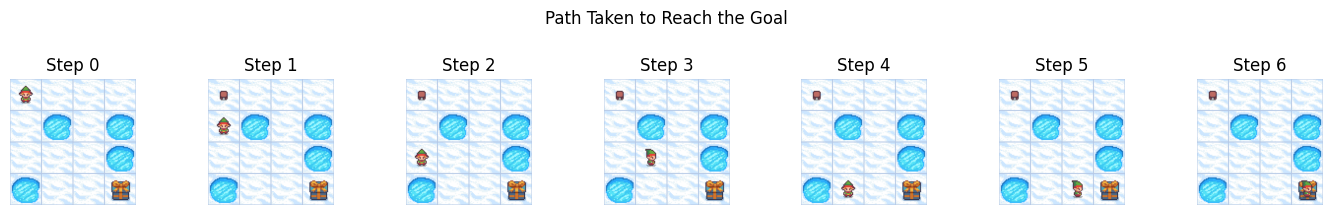

In [ ]:
# Reset the environment again to capture frames from the start
observation, info = env.reset()

# Store images for visualization
framess = []

# Initial frame
framess.append(env.render())

print(f"Initial Observation for Visualization: {observation}\n")

# Execute the sequence of actions and capture frames
for i, action in enumerate(action_sequence):
    print(f"--- Step {i+1} ---")
    print(f"Taking action: {action} ({action_map[action]}) ")
    observation, reward, terminated, truncated, info = env.step(action)
    framess.append(env.render())

    print(f"New Observation: {observation}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")
    print(f"Info: {info}")

    if terminated:
        if reward == 1.0:
            print("Goal reached!")
        else:
            print("Fell into a hole!")
        break # End episode if terminated
    print("\n")

# Display the sequence of frames
fig, axes = plt.subplots(1, len(framess), figsize=(2 * len(framess), 2))
for i, frame in enumerate(framess):
    axes[i].imshow(frame)
    axes[i].axis('off')
    axes[i].set_title(f'Step {i}')

plt.suptitle('Path Taken to Reach the Goal', y=1.05)
plt.tight_layout()
plt.show()

### 5. Explore the Slippery Version of FrozenLake

In [ ]:
# Create the FrozenLake-v1 environment with is_slippery=True
env_slippery = gym.make('FrozenLake-v1', is_slippery=True, render_mode='rgb_array')

# Reset the environment to get the initial observation
observation_slippery, info_slippery = env_slippery.reset()
print(f"Initial Observation (Slippery): {observation_slippery}")

# Take a random action to see stochastic behavior
action_slippery = env_slippery.action_space.sample()
print(f"Taking random action (Slippery): {action_slippery}")

# Step in the environment
new_observation_slippery, reward_slippery, terminated_slippery, truncated_slippery, info_slippery = env_slippery.step(action_slippery)

print(f"New Observation (Slippery): {new_observation_slippery}")
print(f"Reward (Slippery): {reward_slippery}")
print(f"Terminated (Slippery): {terminated_slippery}")
print(f"Truncated (Slippery): {truncated_slippery}")
print(f"Info (Slippery): {info_slippery}")

Initial Observation (Slippery): 0
Taking random action (Slippery): 2
New Observation (Slippery): 1
Reward (Slippery): 0
Terminated (Slippery): False
Truncated (Slippery): False
Info (Slippery): {'prob': 0.3333333333333333}


Notice the `info` dictionary when `is_slippery=True`. The `prob` value is less than `1.0`, indicating the action did not necessarily result in the intended state, and other outcomes are possible.

### 6. Close All Environments

In [ ]:
# It's good practice to close environments when done
env.close()
env_slippery.close()
print("All FrozenLake environments closed.")

All FrozenLake environments closed.


Notice the `info` dictionary when `is_slippery=True`. It will show a list of possible (next state, reward, terminated, probability) tuples, indicating the stochastic nature of the environment. The `prob` value will be less than `1.0` for the intended outcome, and other outcomes will have non-zero probabilities.

In [ ]:
pip install numpy==1.26.4

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-pack

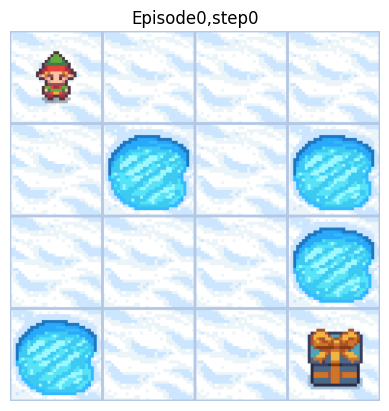

/usr/local/lib/python3.12/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


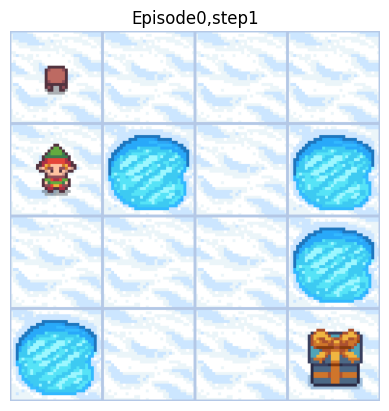

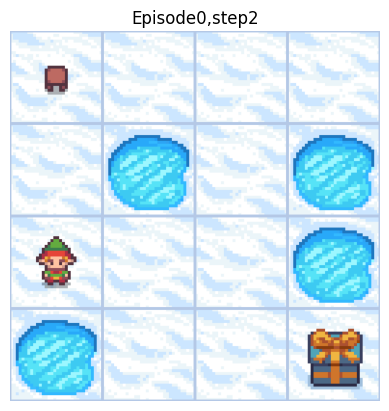

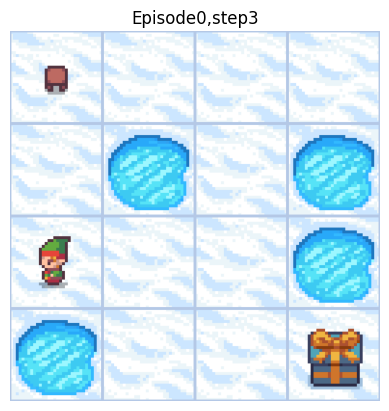

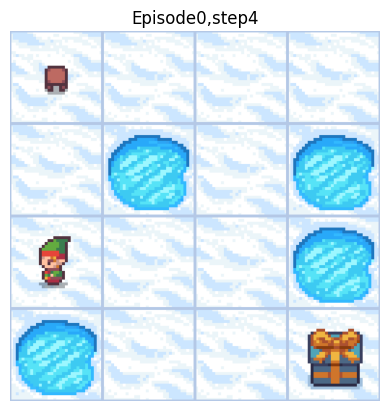

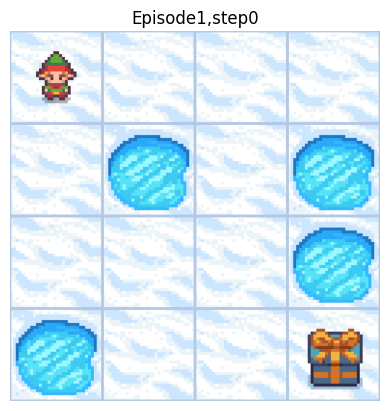

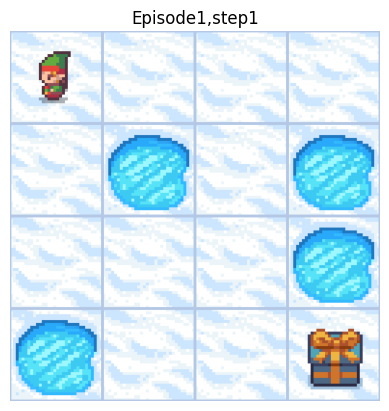

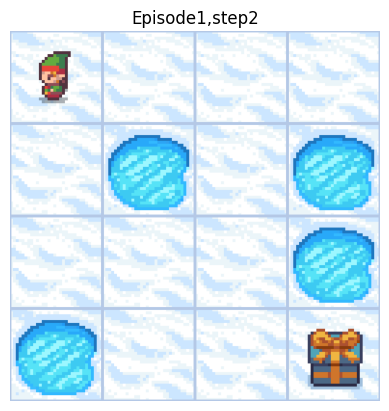

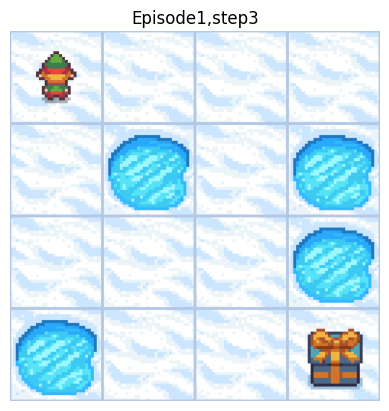

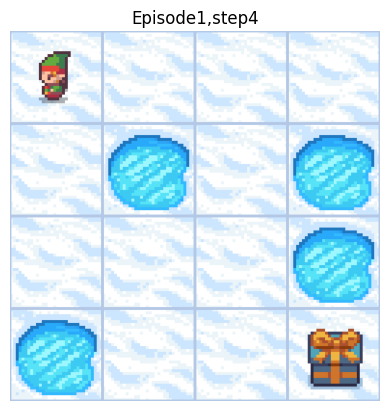

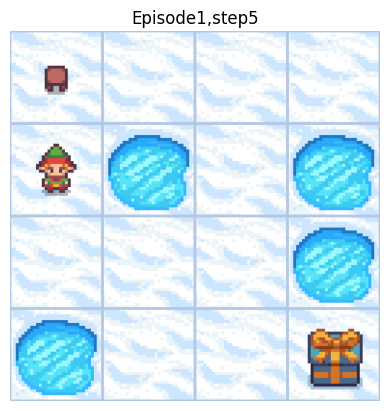

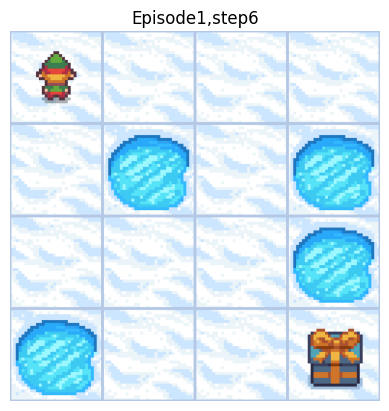

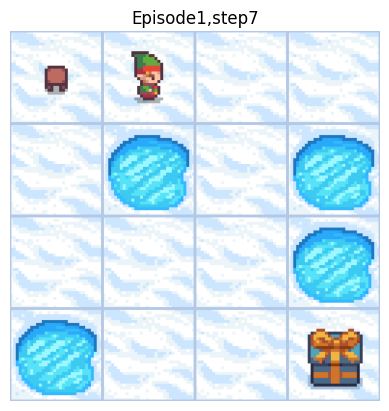

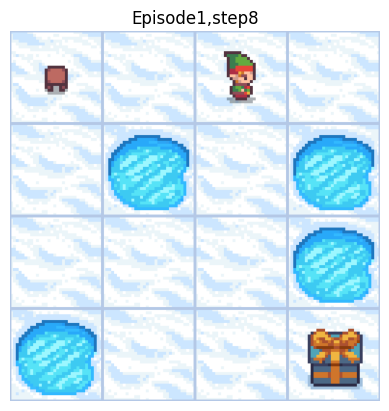

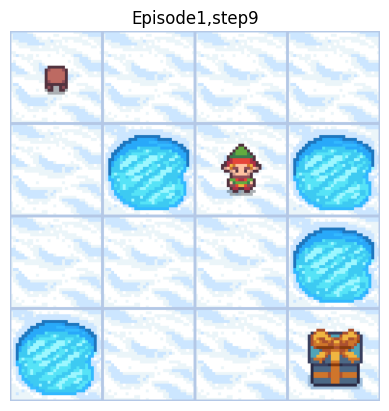

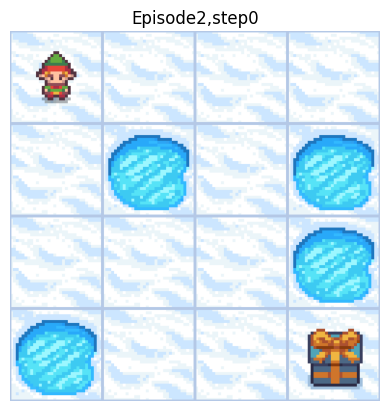

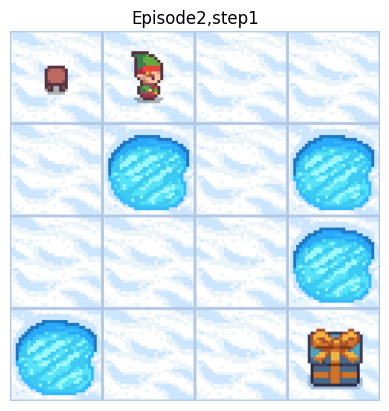

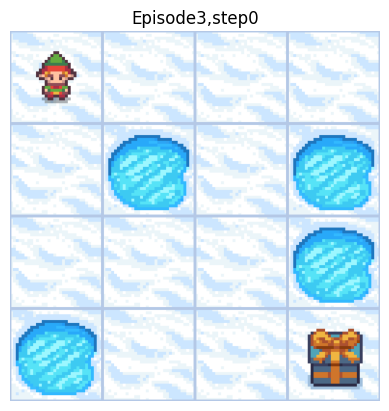

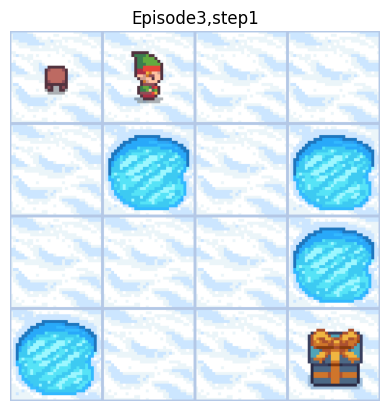

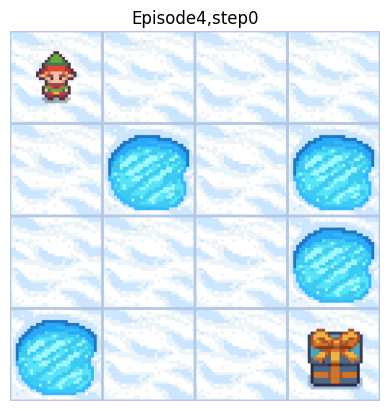

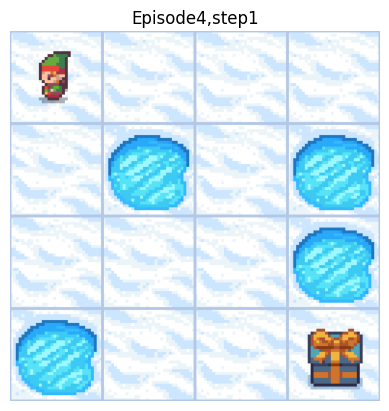

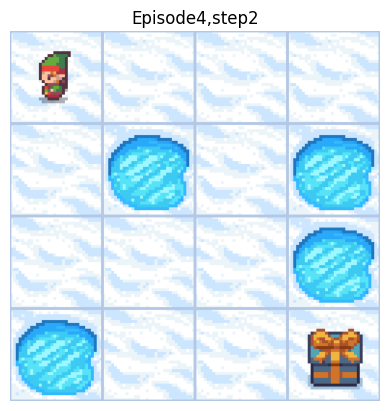

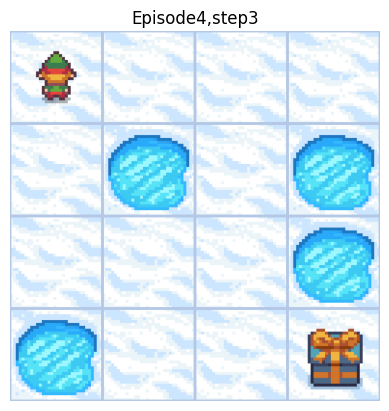

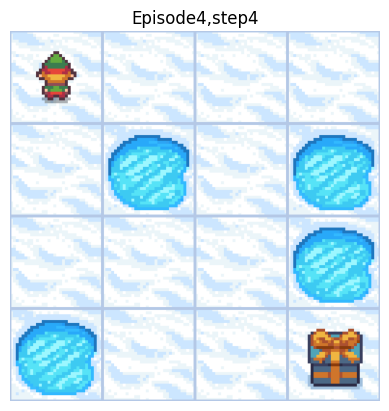

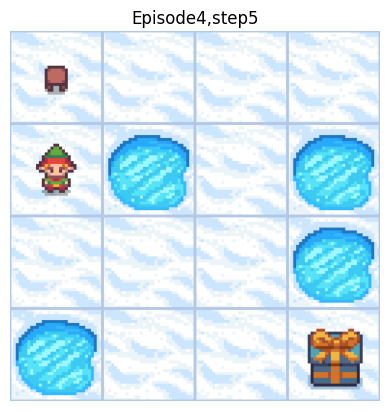

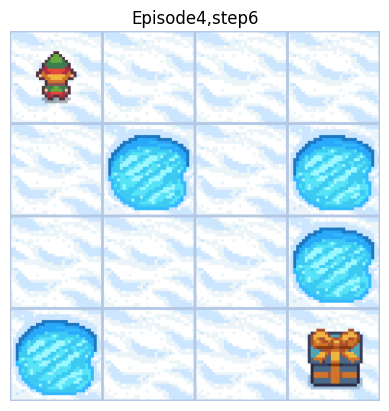

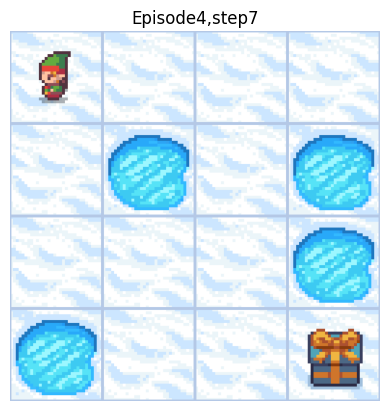

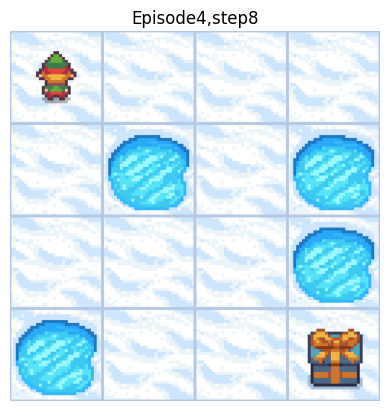

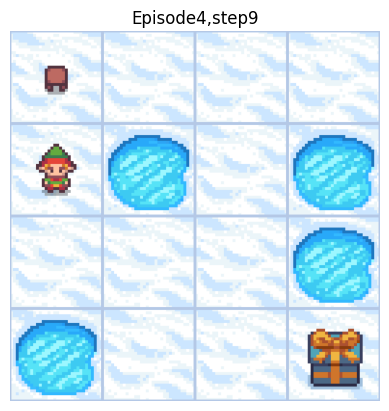

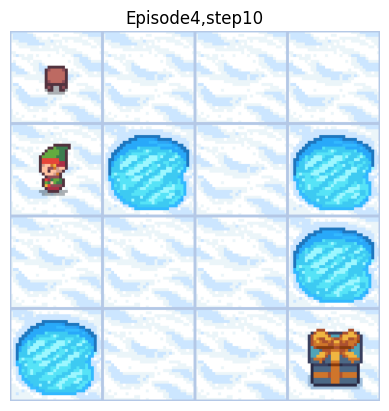

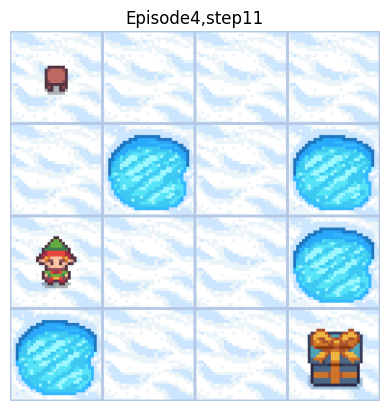

In [ ]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
env=gym.make("FrozenLake-v1",is_slippery=False,render_mode="rgb_array")
episodenumber=5
timesteps=100
for episode in range(episodenumber):
  result=env.reset()#for initial state
  for t in range(timesteps):
    frame=env.render()
    frame=frame[0]
    frame=np.array(frame)#will take the entire of array of state
    plt.imshow(frame)
    plt.title(f"Episode{episode},step{t}")
    plt.axis("off")
    plt.show()
    step_result=env.step(env.action_space.sample())
    #handle gym old/new versions
    if len(step_result)==5:
      obs,reward,terminated,truncated,info=step_result
    else:
      obs,reward,done,info=step_result
      terminated,truncated=done,False
      #slow animation
    time.sleep(0.1)
    if terminated or truncated:
      break
  env.close()

In [ ]:
import gym
import imageio

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
env=gym.make("FrozenLake-v1",render_mode="rgb_array")

/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
import gymnasium as gym
import imageio

# Create the FrozenLake-v1 environment (deterministic)
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

# Reset the environment to get the initial observation
observation, info = env.reset()

# Define the action mapping
action_map = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}

# Define the path as a sequence of actions:
action_sequence = [1, 1, 2, 1, 2, 2, 1]

# Store images for visualization
framess = []

# Initial frame
framess.append(env.render())

# Execute the sequence of actions and capture frames
for i, action in enumerate(action_sequence):  #Take each saved frame and put it into the video file.
    observation, reward, terminated, truncated, info = env.step(action)
    framess.append(env.render())

    if terminated:
        break # End episode if terminated

#output video
video_path="/content/frozenlake.mp4"
writer=imageio.get_writer(video_path,fps=30)

all_frames_for_video = framess #Just assigns all captured frames to a variable for video writing.

print(f"Creating video from {len(all_frames_for_video)} captured frames.")

for frame in all_frames_for_video:
    writer.append_data(frame)

writer.close()

env.close()

print(f"Video saved to {video_path}")

/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Creating video from 7 captured frames.
Video saved to /content/frozenlake.mp4


In [ ]:
from google.colab import files
files.download("/content/frozenlake.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>